In [1]:
%pylab inline
import mpld3
mpld3.enable_notebook() # Allows you to zoom in on plots

Populating the interactive namespace from numpy and matplotlib


In [14]:
from __future__ import division
import math
normrnd = random.normal # (mu, std)

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

## Multiplicative Noise Only

Setup: $ x(n+1) = a \, x(n) \quad y(n) = c(n) \, x(n) $

$$ \alpha(n) = \frac{\mu_c}{2\mu_c^2 + \sigma_c^2} \quad \quad \beta(n) = \frac{a\mu_c}{2\mu_c^2 + \sigma_c^2} $$

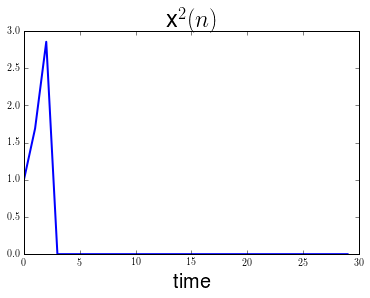

In [37]:
# parameters
time_horizon = 30
trials = 100000 # 100,000
a = 1.3
mu_c, stdc = 1, 1
delay = 1

# constant control
alpha = mu_c / (2*mu_c**2 + stdc**2)
beta = a * mu_c / (2*mu_c**2 + stdc**2)

result = zeros((trials, time_horizon))
for m in range(trials):
    xn, yn, un = zeros(time_horizon), zeros(time_horizon), zeros(time_horizon)
    xn[0] = normrnd(0, 1)
    for t in range(1,time_horizon):
        xn[t] = a * (xn[t-1] - un[t-1])
        yn[t] = normrnd(mu_c, stdc) * xn[t]

        if t % (delay+1) == 0:
            un[t] = alpha*yn[t] + beta*yn[t-1]
    result[m] = xn
    
plot(range(time_horizon), mean(square(result), axis=0), lw=2.0)
#title(r"$\displaystylex^2(n)$", fontsize=24)
title('x^2(n)', fontsize=24)
xlabel('time', fontsize=20)